<a href="https://colab.research.google.com/github/bunny346/APPLICATIONS-OF-DATA-MINING/blob/main/LAB_7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

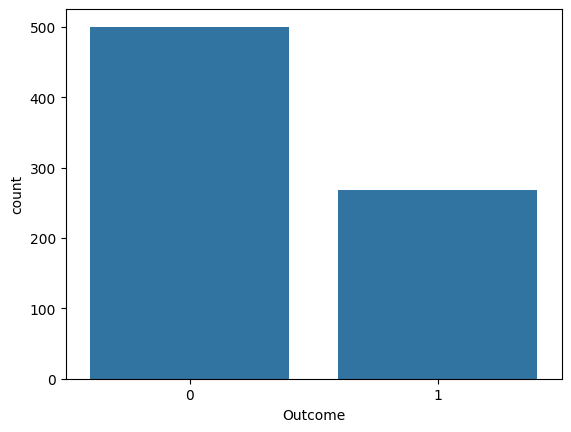

Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

McFadden's R²: 0.9604


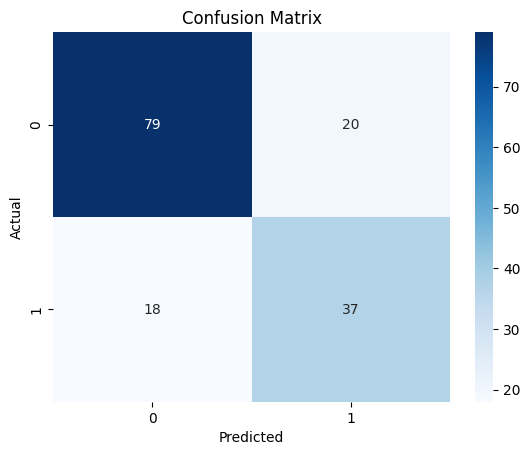

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = "/content/Logistic Regression _diabetes-dataset.csv"
df = pd.read_csv(file_path)

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

# Display first few rows
print(df.head())

# Check for class distribution
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.show()

# Splitting data into features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

from sklearn.metrics import log_loss
import numpy as np

# Calculate log-likelihoods
log_likelihood_model = -log_loss(y_test, model.predict_proba(X_test))
log_likelihood_null = -log_loss(y_test, np.full_like(y_test, y_test.mean()))

# Compute McFadden's R²
r_squared = 1 - (log_likelihood_model / log_likelihood_null)

print(f"McFadden's R²: {r_squared:.4f}")


# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dataset shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
A

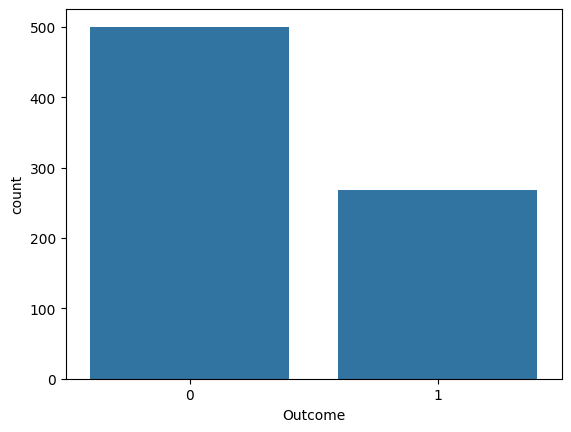

First 5 rows of standardized X:
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]
Train set: (614, 8) (614,)
Test set: (154, 8) (154,)
Logistic Regression Model: LogisticRegression(C=0.01, solver='liblinear')
First 5 Predictions: [0 0 0 0 0]
First 5 Prediction Probabilities:
[[0.65961041 0.34038959]
 [0.73966496 0.26033504]
 [0.74766502 0.25233498]
 [0.53606489 0.46393511]
 [0.6444513  0.3555487 ]]
Accuracy: 0.77
Jaccard Similarity Score: 0.49
Log Loss: 0.52
Confusion Matrix:
[[85 17]
 [18 34]]
Classification Report:
              precisio

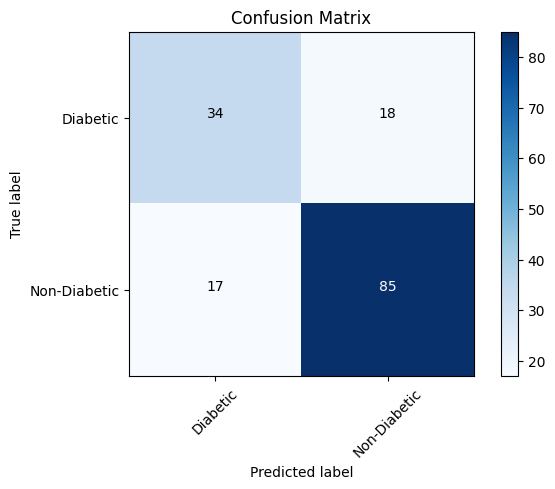

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score, log_loss
from sklearn import preprocessing

# Load the dataset
file_path = "/content/Logistic Regression _diabetes-dataset.csv"
df = pd.read_csv(file_path)

# Selecting relevant features (update based on dataset)
df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
df['Outcome'] = df['Outcome'].astype('int')

# Display dataset shape
print("Dataset shape:", df.shape)

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

# Display first few rows
print(df.head())

# Check for class distribution
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.show()

# Splitting data into features (X) and target (y)
X = np.asarray(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
y = np.asarray(df['Outcome'])

# Standardizing the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Display first 5 rows of X
print("First 5 rows of standardized X:")
print(X[0:5])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Train the logistic regression model with specified hyperparameters
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("Logistic Regression Model:", LR)

# Predictions
yhat = LR.predict(X_test)
print("First 5 Predictions:", yhat[:5])

# Predict probability estimates
yhat_prob = LR.predict_proba(X_test)
print("First 5 Prediction Probabilities:")
print(yhat_prob[:5])

# Evaluate the model
accuracy = accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
log_loss_value = log_loss(y_test, yhat_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Jaccard Similarity Score: {jaccard:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Train logistic regression model with 'sag' solver
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print("LogLoss (sag solver): %.2f" % log_loss(y_test, yhat_prob2))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

# Print confusion matrix
print(cnf_matrix)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic', 'Non-Diabetic'], normalize=False, title='Confusion Matrix')
plt.show()